In [1]:
pip install snowflake-connector-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import getpass
import seaborn as sns
%matplotlib inline
import snowflake.connector

Connecting to Snowflake

In [2]:
conn= snowflake.connector.connect( 
    user = 'PURBAINEURON24',
    password =getpass.getpass('Your Snowflake Password: '),
    account= 'YCFVPSA-YY17354',
    database ='RETAILS',
    schema='PUBLIC',
    warehouse='COMPUTE_WH'
)

Your Snowflake Password:  ········


In [3]:
cur = conn.cursor()

In [4]:
select_demographic_RAW ='SELECT * FROM demographic_RAW'
select_CAMPAIGN_DESC_RAW ='SELECT * FROM CAMPAIGN_DESC_RAW'
select_CAMPAIGN_RAW ='SELECT * FROM CAMPAIGN_RAW'
select_PRODUCT_RAW ='SELECT * FROM PRODUCT_RAW'
select_COUPON_RAW ='SELECT * FROM COUPON_RAW'
select_COUPON_REDEMPT_RAW ='SELECT * FROM COUPON_REDEMPT_RAW'
select_TRANSACTION_RAW ='SELECT * FROM TRANSACTION_RAW'

In [5]:
cur.execute(select_demographic_RAW)
demographic_RAW = cur.fetch_pandas_all()

In [6]:
cur.execute(select_CAMPAIGN_DESC_RAW)
CAMPAIGN_DESC_RAW = cur.fetch_pandas_all()

In [7]:
cur.execute(select_CAMPAIGN_RAW)
CAMPAIGN_RAW = cur.fetch_pandas_all()

In [8]:
cur.execute(select_PRODUCT_RAW)
PRODUCT_RAW = cur.fetch_pandas_all()

In [9]:
cur.execute(select_COUPON_RAW)
COUPON_RAW = cur.fetch_pandas_all()

In [10]:
cur.execute(select_COUPON_REDEMPT_RAW)
COUPON_REDEMPT_RAW = cur.fetch_pandas_all()


In [11]:
cur.execute(select_TRANSACTION_RAW)
TRANSACTION_RAW = cur.fetch_pandas_all()

In [12]:
demographic_RAW.head(5)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,HOUSEHOLD_KEY
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [13]:
CAMPAIGN_DESC_RAW.head(5)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [14]:
CAMPAIGN_RAW.head(5)

,DESCRIPTION,HOUSEHOLD_KEY,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [15]:
PRODUCT_RAW.head(5)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [16]:
COUPON_RAW.head(5)

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [17]:
COUPON_REDEMPT_RAW.head(5)

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [18]:
TRANSACTION_RAW.head(5)


,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2168,30883787272,260,1101173,1,2.00,306,-0.49,1710,38,0,0
1,2168,30883787272,260,1109370,1,1.00,306,-0.99,1710,38,0,0
2,2168,30883787272,260,1116253,1,2.99,306,0.00,1710,38,0,0
3,2168,30883787272,260,1128240,1,2.79,306,-2.10,1710,38,0,0
4,2168,30883787272,260,8090521,1,3.34,306,-1.25,1710,38,0,0


In [19]:
TRANSACTION_RAW.shape

(2595732, 12)

In [20]:
COUPON_REDEMPT_RAW.shape

(2318, 4)

In [21]:
COUPON_RAW.shape

(124548, 3)

In [22]:
PRODUCT_RAW.shape

(92353, 7)

In [23]:
CAMPAIGN_RAW.shape

(7208, 3)

In [24]:
CAMPAIGN_DESC_RAW.shape

(30, 4)

In [25]:
demographic_RAW.shape

(2500, 8)

In [26]:
demographic_RAW.describe()

,HOUSEHOLD_KEY
count,2500.00000
mean,1250.50000
std,721.83216
min,1.00000
25%,625.75000
50%,1250.50000
75%,1875.25000
max,2500.00000


In [27]:
CAMPAIGN_DESC_RAW.describe()

,CAMPAIGN,START_DAY,END_DAY
count,30.000000,30.000000,30.000000
mean,15.500000,463.866667,510.466667
std,8.803408,134.488490,137.730555
min,1.000000,224.000000,264.000000
25%,8.250000,360.000000,405.750000
50%,15.500000,470.000000,502.000000
75%,22.750000,584.000000,640.250000
max,30.000000,659.000000,719.000000


In [28]:
CAMPAIGN_RAW.describe()

,HOUSEHOLD_KEY,CAMPAIGN
count,7208.000000,7208.000000
mean,1268.696726,15.659545
std,731.936391,6.949705
min,1.000000,1.000000
25%,644.000000,9.000000
50%,1263.000000,14.000000
75%,1924.000000,20.000000
max,2500.000000,30.000000


In [29]:
PRODUCT_RAW.describe()

,PRODUCT_ID,MANUFACTURER
count,9.235300e+04,92353.00000
mean,5.328353e+06,1739.22833
std,5.359937e+06,1818.26957
min,2.567100e+04,1.00000
25%,9.706280e+05,328.00000
50%,1.621091e+06,1094.00000
75%,9.704770e+06,2264.00000
max,1.831630e+07,6477.00000


In [30]:
COUPON_RAW.describe()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
count,1.245480e+05,1.245480e+05,124548.000000
mean,2.198225e+10,4.651277e+06,15.855935
std,1.961641e+10,4.843450e+06,6.015524
min,1.000009e+10,2.567100e+04,1.000000
25%,1.000009e+10,9.593030e+05,13.000000
50%,1.000009e+10,1.411451e+06,14.000000
75%,5.111108e+10,8.357538e+06,18.000000
max,5.998660e+10,1.814854e+07,30.000000


In [31]:
COUPON_REDEMPT_RAW.describe()

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN
count,2318.000000,2318.000000,2.318000e+03,2318.000000
mean,1302.816652,528.217429,4.123049e+10,15.551337
std,783.002545,100.360985,1.986068e+10,5.716636
min,1.000000,225.000000,1.000009e+10,1.000000
25%,588.000000,458.250000,1.000009e+10,13.000000
50%,1396.500000,532.000000,5.234003e+10,14.000000
75%,2004.000000,605.000000,5.430002e+10,18.000000
max,2500.000000,704.000000,5.897850e+10,30.000000


In [32]:
TRANSACTION_RAW.describe()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
count,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06,2.595732e+06
mean,1.271953e+03,3.402620e+10,3.887562e+02,2.891435e+06,1.004286e+02,3.104120e+00,3.142673e+03,-5.387054e-01,1.561586e+03,5.622150e+01,-1.803152e-02,-2.578463e-03
std,7.260660e+02,4.711649e+09,1.897210e+02,3.837404e+06,1.153436e+03,4.182274e+00,8.937113e+03,1.249191e+00,3.998378e+02,2.710223e+01,2.276589e-01,5.232086e-02
min,1.000000e+00,2.698485e+10,1.000000e+00,2.567100e+04,0.000000e+00,0.000000e+00,1.000000e+00,-1.800000e+02,0.000000e+00,1.000000e+00,-5.600000e+01,-8.000000e+00
25%,6.560000e+02,3.040805e+10,2.290000e+02,9.174590e+05,1.000000e+00,1.290000e+00,3.300000e+02,-6.900000e-01,1.308000e+03,3.300000e+01,0.000000e+00,0.000000e+00
50%,1.272000e+03,3.276081e+10,3.900000e+02,1.028816e+06,1.000000e+00,2.000000e+00,3.720000e+02,-1.000000e-02,1.613000e+03,5.600000e+01,0.000000e+00,0.000000e+00
75%,1.913000e+03,4.012685e+10,5.530000e+02,1.133018e+06,1.000000e+00,3.490000e+00,4.220000e+02,0.000000e+00,1.843000e+03,8.000000e+01,0.000000e+00,0.000000e+00
max,2.500000e+03,4.230536e+10,7.110000e+02,1.831630e+07,8.963800e+04,8.400000e+02,3.428000e+04,3.990000e+00,2.359000e+03,1.020000e+02,0.000000e+00,0.000000e+00


In [34]:
from datetime import datetime

In [35]:
start_date=pd.to_datetime('2020-01-01')

In [36]:
start_date

Timestamp('2020-01-01 00:00:00')

In [37]:
TRANSACTION_RAW.head(20)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2168,30883787272,260,1101173,1,2.00,306,-0.49,1710,38,0,0
1,2168,30883787272,260,1109370,1,1.00,306,-0.99,1710,38,0,0
2,2168,30883787272,260,1116253,1,2.99,306,0.00,1710,38,0,0
3,2168,30883787272,260,1128240,1,2.79,306,-2.10,1710,38,0,0
4,2168,30883787272,260,8090521,1,3.34,306,-1.25,1710,38,0,0
5,2168,30883787272,260,8203599,1,4.44,306,0.00,1710,38,0,0
6,236,30883787351,260,822677,3,1.77,306,0.00,1722,38,0,0
7,236,30883787351,260,846503,1,4.29,306,0.00,1722,38,0,0
8,1533,30883787364,260,868423,1,1.67,306,-1.32,1724,38,0,0
9,1533,30883787364,260,923528,1,2.00,306,-0.99,1724,38,0,0


In [38]:
TRANSACTION_RAW['Date']= start_date + pd.to_timedelta(TRANSACTION_RAW['DAY'],unit='D')

In [39]:
TRANSACTION_RAW['Date']

0         2020-09-17
1         2020-09-17
2         2020-09-17
3         2020-09-17
4         2020-09-17
             ...    
2595727   2021-06-14
2595728   2021-06-14
2595729   2021-06-14
2595730   2021-06-14
2595731   2021-03-15
Name: Date, Length: 2595732, dtype: datetime64[ns]

In [40]:
CAMPAIGN_DESC_RAW['Start_Date']= start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['START_DAY'],unit='D')


In [41]:
CAMPAIGN_DESC_RAW['End_Date']= start_date + pd.to_timedelta(CAMPAIGN_DESC_RAW['END_DAY'],unit='D')


In [42]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,End_Date
0,TypeB,24,659,719,2021-10-21,2021-12-20
1,TypeC,15,547,708,2021-07-01,2021-12-09
2,TypeB,25,659,691,2021-10-21,2021-11-22
3,TypeC,20,615,685,2021-09-07,2021-11-16
4,TypeB,23,646,684,2021-10-08,2021-11-15
5,TypeB,21,624,656,2021-09-16,2021-10-18
6,TypeB,22,624,656,2021-09-16,2021-10-18
7,TypeA,18,587,642,2021-08-10,2021-10-04
8,TypeB,19,603,635,2021-08-26,2021-09-27
9,TypeB,17,575,607,2021-07-29,2021-08-30


In [43]:
COUPON_REDEMPT_RAW['Date']= start_date + pd.to_timedelta(COUPON_REDEMPT_RAW['DAY'],unit='D')

In [44]:
COUPON_REDEMPT_RAW

,HOUSEHOLD_KEY,DAY,COUPON_UPC,CAMPAIGN,Date
0,1,421,10000085364,8,2021-02-25
1,1,421,51700010076,8,2021-02-25
2,1,427,54200000033,8,2021-03-03
3,1,597,10000085476,18,2021-08-20
4,1,597,54200029176,18,2021-08-20
...,...,...,...,...,...
2313,2496,592,54900050076,18,2021-08-15
2314,2496,610,55100000013,18,2021-09-02
2315,2500,449,53663200076,8,2021-03-25
2316,2500,449,54300031076,8,2021-03-25


In [45]:
TRANSACTION_RAW['Date'].max()

Timestamp('2021-12-12 00:00:00')

In [46]:
CAMPAIGN_DESC_RAW['End_Date'].max()

Timestamp('2021-12-20 00:00:00')

In [47]:
COUPON_REDEMPT_RAW['Date'].max()

Timestamp('2021-12-05 00:00:00')

In [48]:
demographic_RAW.dtypes

AGE_DESC               object
MARITAL_STATUS_CODE    object
INCOME_DESC            object
HOMEOWNER_DESC         object
HH_COMP_DESC           object
HOUSEHOLD_SIZE_DESC    object
KID_CATEGORY_DESC      object
HOUSEHOLD_KEY           int16
dtype: object

In [49]:
demographic_RAW['AGE_DESC'].value_counts()

AGE_DESC
45-54    901
35-44    594
25-34    445
65+      230
55-64    187
19-24    143
Name: count, dtype: int64

In [50]:
demographic_RAW['HOUSEHOLD_SIZE_DESC'].value_counts()

HOUSEHOLD_SIZE_DESC
2     1004
1      783
3      338
5+     206
4      169
Name: count, dtype: int64

In [51]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION            object
CAMPAIGN                 int8
START_DAY               int16
END_DAY                 int16
Start_Date     datetime64[ns]
End_Date       datetime64[ns]
dtype: object

In [52]:
CAMPAIGN_DESC_RAW['Duration_days']=CAMPAIGN_DESC_RAW['End_Date'] - CAMPAIGN_DESC_RAW['Start_Date']

In [53]:
CAMPAIGN_DESC_RAW.head(10)

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,End_Date,Duration_days
0,TypeB,24,659,719,2021-10-21,2021-12-20,60 days
1,TypeC,15,547,708,2021-07-01,2021-12-09,161 days
2,TypeB,25,659,691,2021-10-21,2021-11-22,32 days
3,TypeC,20,615,685,2021-09-07,2021-11-16,70 days
4,TypeB,23,646,684,2021-10-08,2021-11-15,38 days
5,TypeB,21,624,656,2021-09-16,2021-10-18,32 days
6,TypeB,22,624,656,2021-09-16,2021-10-18,32 days
7,TypeA,18,587,642,2021-08-10,2021-10-04,55 days
8,TypeB,19,603,635,2021-08-26,2021-09-27,32 days
9,TypeB,17,575,607,2021-07-29,2021-08-30,32 days


In [54]:
CAMPAIGN_DESC_RAW['Duration_days']=CAMPAIGN_DESC_RAW['Duration_days'].dt.days

In [55]:
CAMPAIGN_DESC_RAW['Duration_days'].mean()

46.6

<Axes: xlabel='CAMPAIGN', ylabel='Duration_days'>

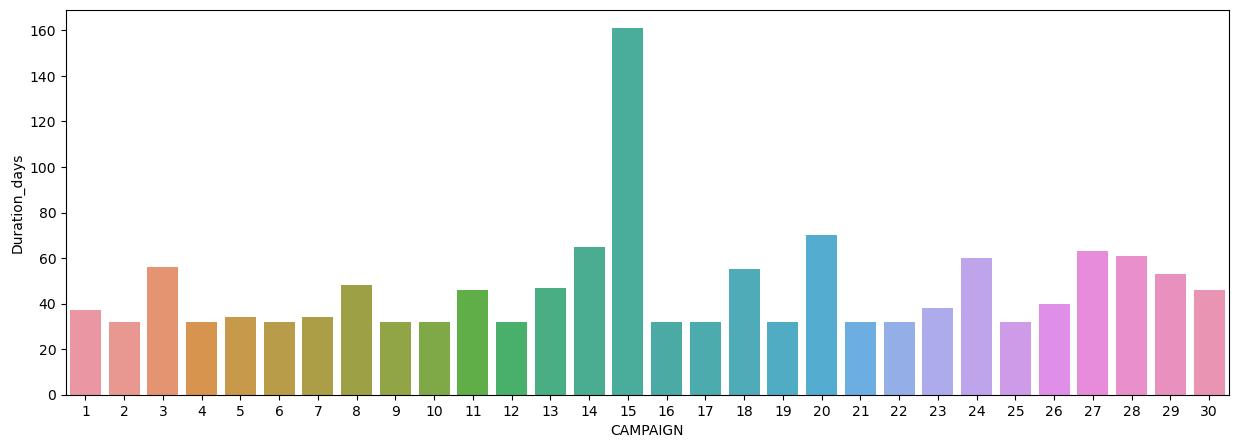

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN', y='Duration_days', data=CAMPAIGN_DESC_RAW)

Campaign 15 lasted more than 160 days

In [57]:
CAMPAIGN_DESC_RAW.groupby('DESCRIPTION').aggregate({'CAMPAIGN':'count','Duration_days':'mean'})

,CAMPAIGN,Duration_days
DESCRIPTION,,
TypeA,5,47.200000
TypeB,19,37.631579
TypeC,6,74.500000


There have been 19 types B campaigns, whose average length was 38 days. In comparison, there have been 6 type C campaigns of 75 days on average.

In [58]:
CAMPAIGN_DESC_RAW['Start_month'] = CAMPAIGN_DESC_RAW['Start_Date'].dt.strftime('%m')

In [59]:
CAMPAIGN_DESC_RAW['End_month'] = CAMPAIGN_DESC_RAW['End_Date'].dt.strftime('%m')

In [60]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,End_Date,Duration_days,Start_month,End_month
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11


In [61]:
CAMPAIGN_DESC_RAW['Start_year'] = CAMPAIGN_DESC_RAW['Start_Date'].dt.strftime('%Y')

In [62]:
CAMPAIGN_DESC_RAW['End_year'] = CAMPAIGN_DESC_RAW['End_Date'].dt.strftime('%Y')

In [63]:
CAMPAIGN_DESC_RAW.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY,Start_Date,End_Date,Duration_days,Start_month,End_month,Start_year,End_year
0,TypeB,24,659,719,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,547,708,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,659,691,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,615,685,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,646,684,2021-10-08,2021-11-15,38,10,11,2021,2021


In [64]:
CAMPAIGN_DESC_RAW.shape

(30, 11)

In [65]:
CAMPAIGN_RAW.shape

(7208, 3)

In [66]:
CAMPAIGN_RAW.columns

Index(['DESCRIPTION', 'HOUSEHOLD_KEY', 'CAMPAIGN'], dtype='object')

In [67]:
CAMPAIGN_RAW.isnull().sum()

DESCRIPTION      0
HOUSEHOLD_KEY    0
CAMPAIGN         0
dtype: int64

In [68]:
CAMPAIGN_RAW['HOUSEHOLD_KEY'].nunique()

1584

In [69]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2500

There are 1584 household have participated to the campaign , leaving 916 households who never participated to any campaign.

In [70]:
CAMPAIGN_RAW.dtypes

DESCRIPTION      object
HOUSEHOLD_KEY     int16
CAMPAIGN           int8
dtype: object

In [71]:
CAMPAIGN_RAW.groupby('HOUSEHOLD_KEY')['CAMPAIGN'].count()

HOUSEHOLD_KEY
1       8
2       1
3       3
4       1
6       4
       ..
2496    5
2497    3
2498    6
2499    2
2500    8
Name: CAMPAIGN, Length: 1584, dtype: int64

Text(0, 0.5, 'Number of Household Reached to')

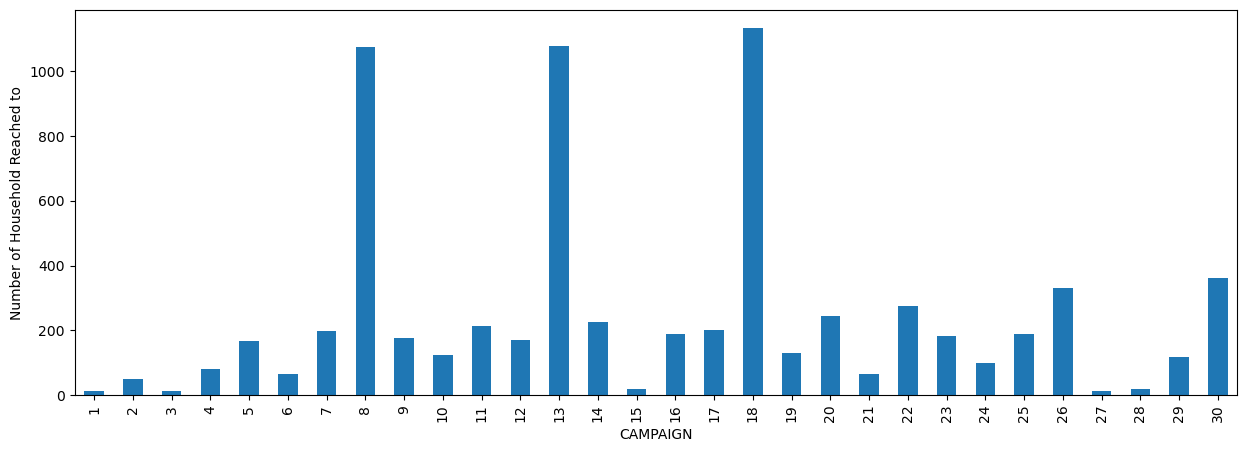

In [72]:
plt.figure(figsize=(15,5))
CAMPAIGN_RAW.groupby('CAMPAIGN')['HOUSEHOLD_KEY'].count().plot.bar()
plt.ylabel('Number of Household Reached to')
           

In Campaign 18 maximun number of household participated

In [73]:
COUPON_RAW.shape

(124548, 3)

In [74]:
COUPON_RAW.columns

Index(['COUPON_UPC', 'PRODUCT_ID', 'CAMPAIGN'], dtype='object')

In [75]:
COUPON_RAW['COUPON_UPC'].nunique()

1135

In [76]:
COUPON_RAW.isnull().sum()

COUPON_UPC    0
PRODUCT_ID    0
CAMPAIGN      0
dtype: int64

In [77]:
Coupon_Given=COUPON_RAW.groupby("CAMPAIGN").aggregate(Total_product=('PRODUCT_ID','nunique'),
                                                     Total_Coupon_Given=('COUPON_UPC','nunique'))

In [78]:
Coupon_Given.head(10)

,Total_product,Total_Coupon_Given
CAMPAIGN,,
1,383,11
2,301,16
3,506,34
4,200,12
5,443,11
6,18,1
7,259,8
8,17178,209
9,825,18


In [79]:
Coupon_Given.sort_values(by= 'Total_product',ascending = False).head(10)

,Total_product,Total_Coupon_Given
CAMPAIGN,,
13,35616,207
18,35513,209
8,17178,209
26,3396,181
30,3205,181
22,1917,21
24,1887,2
16,1025,13
25,826,17


In [80]:
Coupon_Given = Coupon_Given.merge(right = CAMPAIGN_DESC_RAW, on= 'CAMPAIGN' , how='left')

In [81]:
Coupon_Given.head(10)

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,Duration_days,Start_month,End_month,Start_year,End_year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021
5,6,18,1,TypeC,393,425,2021-01-28,2021-03-01,32,01,03,2021,2021
6,7,259,8,TypeB,398,432,2021-02-02,2021-03-08,34,02,03,2021,2021
7,8,17178,209,TypeA,412,460,2021-02-16,2021-04-05,48,02,04,2021,2021
8,9,825,18,TypeB,435,467,2021-03-11,2021-04-12,32,03,04,2021,2021
9,10,393,14,TypeB,463,495,2021-04-08,2021-05-10,32,04,05,2021,2021


In [82]:
Coupon_Given.columns

Index(['CAMPAIGN', 'Total_product', 'Total_Coupon_Given', 'DESCRIPTION',
       'START_DAY', 'END_DAY', 'Start_Date', 'End_Date', 'Duration_days',
       'Start_month', 'End_month', 'Start_year', 'End_year'],
      dtype='object')

In [83]:
Coupon_Given.loc[:,('CAMPAIGN', 'Total_product', 'Total_Coupon_Given', 'DESCRIPTION','START_DAY', 'END_DAY', 'Start_month', 'End_month','Start_year','End_year','Duration_days')].sort_values(by='Total_product',ascending= False).head(10)

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_month,End_month,Start_year,End_year,Duration_days
12,13,35616,207,TypeA,504,551,05,07,2021,2021,47
17,18,35513,209,TypeA,587,642,08,10,2021,2021,55
7,8,17178,209,TypeA,412,460,02,04,2021,2021,48
25,26,3396,181,TypeA,224,264,08,09,2020,2020,40
29,30,3205,181,TypeA,323,369,11,01,2020,2021,46
21,22,1917,21,TypeB,624,656,09,10,2021,2021,32
23,24,1887,2,TypeB,659,719,10,12,2021,2021,60
15,16,1025,13,TypeB,561,593,07,08,2021,2021,32
24,25,826,17,TypeB,659,691,10,11,2021,2021,32
8,9,825,18,TypeB,435,467,03,04,2021,2021,32


Campaign 13,18,8 are the ones with most product in them

In [84]:
Coupon_product = COUPON_RAW.merge(right=PRODUCT_RAW, on='PRODUCT_ID', how='left')

In [85]:
Coupon_product.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,10000089061,27160,4,69,GROCERY,Private,SHORTENING/OIL,VEGETABLE/SALAD OIL,48 OZ
1,10000089064,27754,9,69,GROCERY,Private,FRZN VEGETABLE/VEG DSH,FRZN BAGGED VEGETABLES - PLAIN,16 OZ
2,10000089073,28897,12,69,GROCERY,Private,EGGS,EGGS - X-LARGE,A D 1 DZ
3,51800009050,28919,28,236,GROCERY,National,REFRGRATD DOUGH PRODUCTS,REFRIGERATED COOKIES-CHUB,16.5 OZ
4,52100000076,28929,25,317,GROCERY,National,CHEESE,STRING CHEESE,AB 8 OZ


In [86]:
Coupon_product.isnull().sum()

COUPON_UPC              0
PRODUCT_ID              0
CAMPAIGN                0
MANUFACTURER            0
DEPARTMENT              0
BRAND                   0
COMMODITY_DESC          0
SUB_COMMODITY_DESC      0
CURR_SIZE_OF_PRODUCT    0
dtype: int64

In [87]:
Coupon_product['COMMODITY_DESC'].value_counts().head(10)

COMMODITY_DESC
HAIR CARE PRODUCTS        6261
MAKEUP AND TREATMENT      5585
FRZN MEAT/MEAT DINNERS    4893
FROZEN PIZZA              3658
BEEF                      3314
ICE CREAM/MILK/SHERBTS    3257
CHEESE                    3146
YOGURT                    2460
ORAL HYGIENE PRODUCTS     2437
LUNCHMEAT                 2425
Name: count, dtype: int64

In [88]:
COUPON_REDEMPT_RAW.shape

(2318, 5)

In [89]:
COUPON_REDEMPT_RAW.columns

Index(['HOUSEHOLD_KEY', 'DAY', 'COUPON_UPC', 'CAMPAIGN', 'Date'], dtype='object')

In [90]:
COUPON_REDEMPT_RAW['COUPON_UPC'].nunique()

556

Only 556 coupon have been used out of 1135

<Axes: xlabel='CAMPAIGN'>

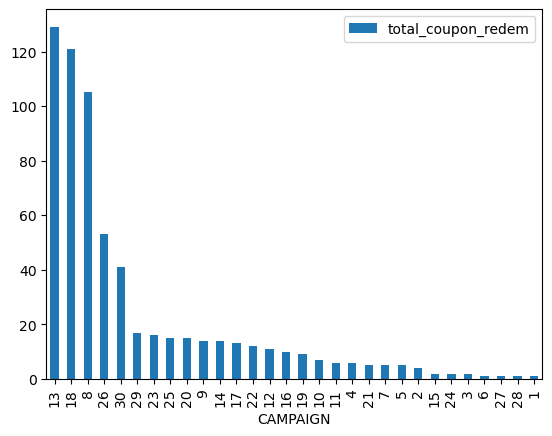

In [91]:
COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_redem =('COUPON_UPC','nunique')).sort_values(by='total_coupon_redem',ascending= False).plot.bar()

In [92]:
Coupon_redem = COUPON_REDEMPT_RAW.groupby('CAMPAIGN').agg(total_coupon_redem=('COUPON_UPC','nunique'))

In [93]:
Coupon_redem.sort_values(by= 'total_coupon_redem', ascending=False)

,total_coupon_redem
CAMPAIGN,
13,129
18,121
8,105
26,53
30,41
29,17
23,16
25,15
20,15


In [94]:
Coupon_Given.head()

,CAMPAIGN,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,Duration_days,Start_month,End_month,Start_year,End_year
0,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


In [95]:
Coupon_redem = Coupon_redem.merge(right=Coupon_Given, on= 'CAMPAIGN', how = 'left')

In [96]:
Coupon_redem.head()

,CAMPAIGN,total_coupon_redem,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,Duration_days,Start_month,End_month,Start_year,End_year
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021


In [97]:
Coupon_redem['Coupon_redem_rate'] = (Coupon_redem['total_coupon_redem']/Coupon_redem['Total_Coupon_Given'])*100

In [98]:
Coupon_redem.head().sort_values( by = 'Coupon_redem_rate', ascending= False)

,CAMPAIGN,total_coupon_redem,Total_product,Total_Coupon_Given,DESCRIPTION,START_DAY,END_DAY,Start_Date,End_Date,Duration_days,Start_month,End_month,Start_year,End_year,Coupon_redem_rate
3,4,6,200,12,TypeB,372,404,2021-01-07,2021-02-08,32,01,02,2021,2021,50.000000
4,5,5,443,11,TypeB,377,411,2021-01-12,2021-02-15,34,01,02,2021,2021,45.454545
1,2,4,301,16,TypeB,351,383,2020-12-17,2021-01-18,32,12,01,2020,2021,25.000000
0,1,1,383,11,TypeB,346,383,2020-12-12,2021-01-18,37,12,01,2020,2021,9.090909
2,3,2,506,34,TypeC,356,412,2020-12-22,2021-02-16,56,12,02,2020,2021,5.882353


<Axes: xlabel='CAMPAIGN', ylabel='Coupon_redem_rate'>

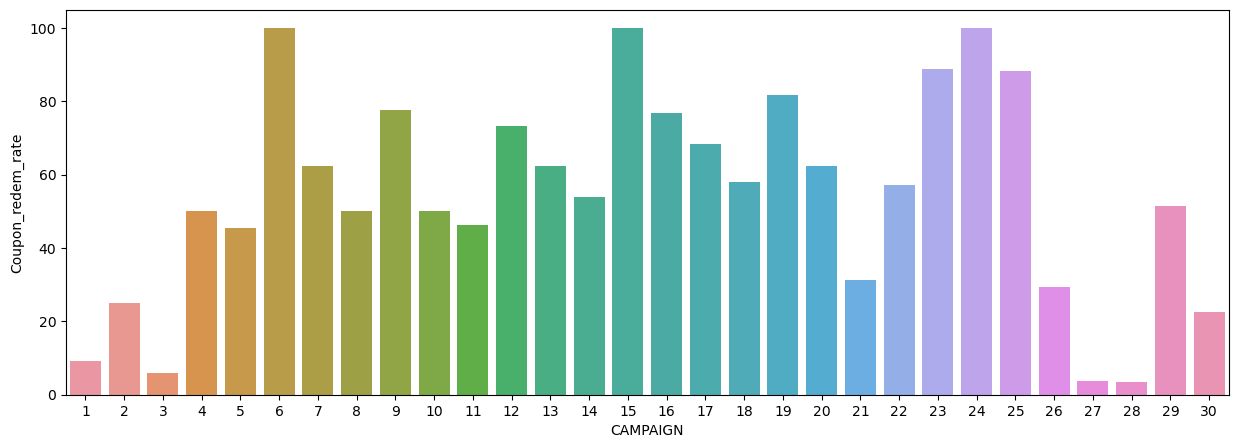

In [99]:
plt.figure(figsize=(15,5))
sns.barplot(x='CAMPAIGN', y='Coupon_redem_rate', data=Coupon_redem)

In [100]:
TRANSACTION_RAW.columns

Index(['HOUSEHOLD_KEY', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY',
       'SALES_VALUE', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO',
       'COUPON_DISC', 'COUPON_MATCH_DISC', 'Date'],
      dtype='object')

In [101]:
TRANSACTION_RAW.isnull().sum()

HOUSEHOLD_KEY        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
Date                 0
dtype: int64

In [102]:
TRANSACTION_RAW['BASKET_ID'].count()

2595732

In [103]:
TRANSACTION_RAW['BASKET_ID'].nunique()

276484

In [104]:
TRANSACTION_RAW['HOUSEHOLD_KEY'].nunique()

2500

In [105]:
trnx_bucket= TRANSACTION_RAW.groupby('BASKET_ID').aggregate({'SALES_VALUE':'sum','COUPON_DISC':'sum','COUPON_MATCH_DISC':'sum'})

In [106]:
trnx_bucket.head(10)

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC
BASKET_ID,,,
26984851472,5.91,0,0
26984851516,12.43,0,0
26984896261,11.37,0,0
26984905972,2.55,0,0
26984945254,3.53,0,0
26984951769,5.79,0,0
26985025264,44.78,0,0
26985040735,139.22,0,0
26985052379,0.99,0,0


In [107]:
trnx_bucket['USE_COUPON']=trnx_bucket['COUPON_DISC']!=0

In [108]:
trnx_bucket['USE_COUPON'].value_counts()

USE_COUPON
False    260812
True      15672
Name: count, dtype: int64

In [109]:
trnx_bucket.sort_values('SALES_VALUE', ascending=False).head(10)

,SALES_VALUE,COUPON_DISC,COUPON_MATCH_DISC,USE_COUPON
BASKET_ID,,,,
32006114302,961.49,0,0,False
40387571385,681.58,0,0,False
33347880492,552.92,-3,0,True
32505140858,545.17,0,0,False
30983766334,545.07,0,0,False
35638473903,543.83,0,0,False
34267311742,518.01,0,0,False
30515165970,508.58,0,0,False
32187143334,499.99,0,0,False


In [110]:
round(trnx_bucket['SALES_VALUE'].mean(),2)

29.14

The average basket value is $26.93

Text(0.5, 1.0, 'Basket value boxplot')

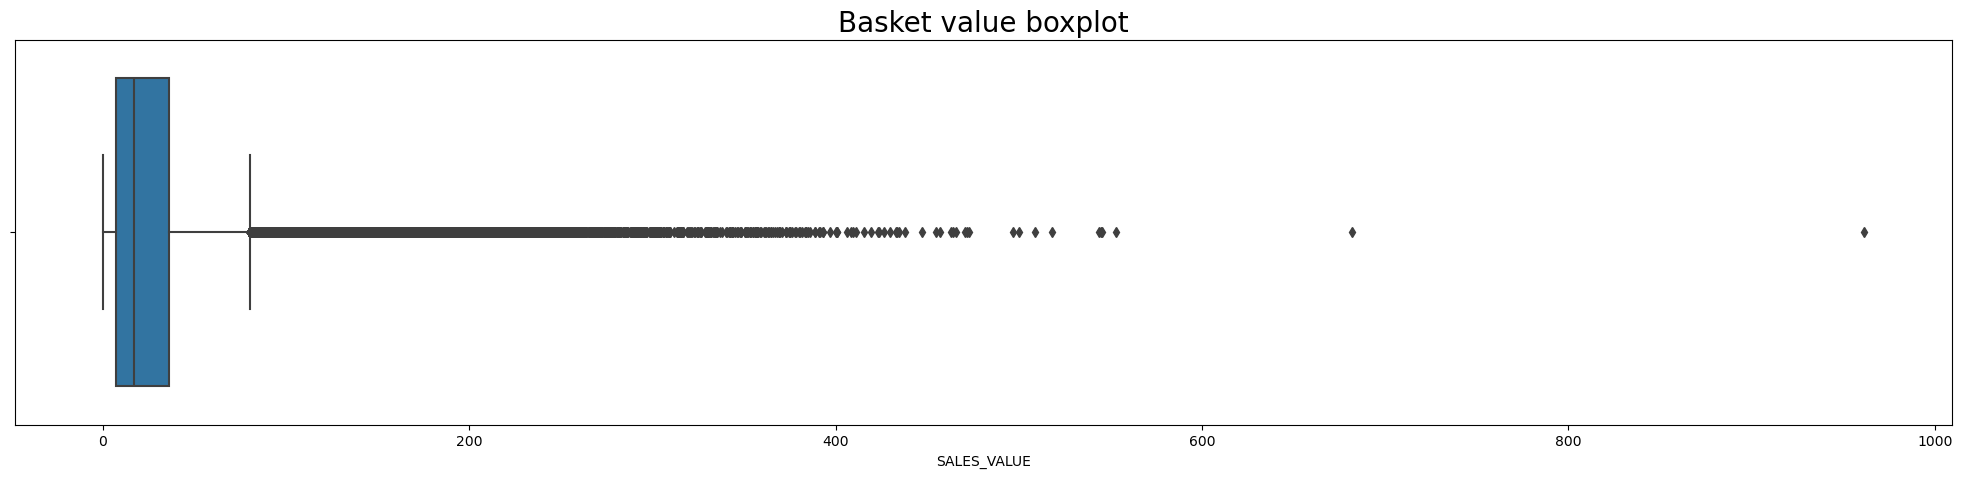

In [111]:
plt.figure(figsize=(25,5))
sns.boxplot(x=trnx_bucket['SALES_VALUE'])
plt.title('Basket value boxplot', fontsize=20)

In [112]:
trnx_bucket.groupby('USE_COUPON').aggregate(sales_mean=('SALES_VALUE', 'mean'),
                                            COUPON_DISC_mean =('COUPON_DISC','mean'),
                                            COUPON_MATCH_DISC=('COUPON_MATCH_DISC','mean'),
                                            No_coupon=('SALES_VALUE','count'))

,sales_mean,COUPON_DISC_mean,COUPON_MATCH_DISC,No_coupon
USE_COUPON,,,,
False,26.795021,0.000000,-0.000019,260812
True,68.210833,-2.986536,-0.426748,15672


In [113]:
trnx_desc = TRANSACTION_RAW.merge(right=trnx_bucket, on ='BASKET_ID', how= 'left')

In [114]:
trnx_desc.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,USE_COUPON
0,2168,30883787272,260,1101173,1,2.00,306,-0.49,1710,38,0,0,2020-09-17,40.34,0,0,False
1,2168,30883787272,260,1109370,1,1.00,306,-0.99,1710,38,0,0,2020-09-17,40.34,0,0,False
2,2168,30883787272,260,1116253,1,2.99,306,0.00,1710,38,0,0,2020-09-17,40.34,0,0,False
3,2168,30883787272,260,1128240,1,2.79,306,-2.10,1710,38,0,0,2020-09-17,40.34,0,0,False
4,2168,30883787272,260,8090521,1,3.34,306,-1.25,1710,38,0,0,2020-09-17,40.34,0,0,False


In [115]:
trnx_desc = trnx_desc.merge(right=PRODUCT_RAW, on ='PRODUCT_ID', how= 'left')

In [116]:
trnx_desc.head(4)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,...,SALES_VALUE_y,COUPON_DISC_y,COUPON_MATCH_DISC_y,USE_COUPON,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2168,30883787272,260,1101173,1,2.00,306,-0.49,1710,38,...,40.34,0,0,False,317,GROCERY,National,DINNER MXS:DRY,MACARONI & CHEESE DNRS,12 OZ
1,2168,30883787272,260,1109370,1,1.00,306,-0.99,1710,38,...,40.34,0,0,False,1094,MEAT-PCKGD,National,LUNCHMEAT,BOLOGNA,12 OZ
2,2168,30883787272,260,1116253,1,2.99,306,0.00,1710,38,...,40.34,0,0,False,1094,MEAT-PCKGD,National,MISCELLANEOUS,PICKLES,32 OZ
3,2168,30883787272,260,1128240,1,2.79,306,-2.10,1710,38,...,40.34,0,0,False,3481,MEAT,National,PORK,ENHANCED,


In [117]:
trnx_desc.drop(['SALES_VALUE_y','COUPON_DISC_y','COUPON_MATCH_DISC_y'],axis=1, inplace= True)

In [118]:
trnx_desc.head(10)

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE_x,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC_x,COUPON_MATCH_DISC_x,Date,USE_COUPON,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2168,30883787272,260,1101173,1,2.00,306,-0.49,1710,38,0,0,2020-09-17,False,317,GROCERY,National,DINNER MXS:DRY,MACARONI & CHEESE DNRS,12 OZ
1,2168,30883787272,260,1109370,1,1.00,306,-0.99,1710,38,0,0,2020-09-17,False,1094,MEAT-PCKGD,National,LUNCHMEAT,BOLOGNA,12 OZ
2,2168,30883787272,260,1116253,1,2.99,306,0.00,1710,38,0,0,2020-09-17,False,1094,MEAT-PCKGD,National,MISCELLANEOUS,PICKLES,32 OZ
3,2168,30883787272,260,1128240,1,2.79,306,-2.10,1710,38,0,0,2020-09-17,False,3481,MEAT,National,PORK,ENHANCED,
4,2168,30883787272,260,8090521,1,3.34,306,-1.25,1710,38,0,0,2020-09-17,False,103,GROCERY,National,SOFT DRINKS,SOFT DRINKS 12/18&15PK CAN CAR,12 OZ
5,2168,30883787272,260,8203599,1,4.44,306,0.00,1710,38,0,0,2020-09-17,False,3280,SEAFOOD,National,SEAFOOD-FRESH,SEAFOOD-FRE-CATFISH,
6,236,30883787351,260,822677,3,1.77,306,0.00,1722,38,0,0,2020-09-17,False,69,GROCERY,Private,SOFT DRINKS,SFT DRNK 2 LITER BTL CARB INCL,2 LTR
7,236,30883787351,260,846503,1,4.29,306,0.00,1722,38,0,0,2020-09-17,False,1208,GROCERY,National,WATER - CARBONATED/FLVRD DRINK,NON-CRBNTD DRNKING/MNERAL WATE,.5 LITER
8,1533,30883787364,260,868423,1,1.67,306,-1.32,1724,38,0,0,2020-09-17,False,69,GROCERY,Private,CHEESE,NATURAL CHEESE EXACT WT SLICES,6 OZ
9,1533,30883787364,260,923528,1,2.00,306,-0.99,1724,38,0,0,2020-09-17,False,531,GROCERY,National,BAKING NEEDS,BITS & MORSELS,12 OZ


In [119]:
COMMODITY_Coupon = trnx_desc.groupby('COMMODITY_DESC').aggregate(total_quantity=('QUANTITY','count'),
                                             USE_COUPON=('USE_COUPON','sum'),
                                             Coupon=('COUPON_DISC_x','sum'))

In [120]:
COMMODITY_Coupon.head(10)

,total_quantity,USE_COUPON,Coupon
COMMODITY_DESC,,,
,7839,6019,-10596
(CORP USE ONLY),61,5,0
ADULT INCONTINENCE,553,87,-37
AIR CARE,5556,1320,-929
ANALGESICS,4769,692,-13
ANTACIDS,1889,280,-22
APPAREL,510,59,-1
APPLES,14440,2209,0
AUDIO/VIDEO PRODUCTS,1073,125,-46


In [121]:
COMMODITY_Coupon['Coupon%']=round((COMMODITY_Coupon['USE_COUPON']/COMMODITY_Coupon['total_quantity'])*100,2)

In [122]:
COMMODITY_Coupon.sort_values('Coupon%',ascending=False).head(30)

,total_quantity,USE_COUPON,Coupon,Coupon%
COMMODITY_DESC,,,,
,7839,6019,-10596,76.78
BABY FOODS,20356,5648,-349,27.75
RESTRICTED DIET,51,13,0,25.49
DIAPERS & DISPOSABLES,5008,1216,-1110,24.28
AIR CARE,5556,1320,-929,23.76
FRZN SEAFOOD,64,15,0,23.44
BULK FOODS,9,2,0,22.22
BABY HBC,4626,1020,-325,22.05
FRZN BREAKFAST FOODS,10595,2286,-421,21.58


**While the most prominents products for which coupons are created are haircare and makeup products, coupons are mostly used on drinks, cigarettes, diapers, etc. Bathroom products are not even among the top 10**

In [123]:
TRANSACTION_RAW.groupby(['HOUSEHOLD_KEY','WEEK_NO','DAY']).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                  'COUPON_DISC' :'sum','COUPON_MATCH_DISC':'sum'})

SALES_VALUE  RETAIL_DISC  COUPON_DISC  \
HOUSEHOLD_KEY WEEK_NO DAY                                          
1             8       51         78.66       -16.54           -1   
              10      67         41.10        -8.59            0   
              13      88         26.90        -6.72            0   
              14      94         63.43       -11.08           -2   
              15      101        53.45       -16.42            0   
...                                ...          ...          ...   
2500          100     695        57.68       -14.85           -2   
                      698        50.54       -14.72           -2   
              101     704        73.65       -19.79           -2   
              102     706        13.95        -0.42            0   
                      708        45.12       -15.99           -1   

                           COUPON_MATCH_DISC  
HOUSEHOLD_KEY WEEK_NO DAY                     
1             8       51                   0  
              10      67                   0  
              13      88                   0  
              14      94                  -1  
              15      101                  0  
...                                      ...  
2500          100     695                  0  
                      698                  0  
              101     704                  0  
              102     706                  0  
                      708                  0  

[225533 rows x 4 columns]

In [124]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2168,30883787272,260,1101173,1,2.00,306,-0.49,1710,38,0,0,2020-09-17
1,2168,30883787272,260,1109370,1,1.00,306,-0.99,1710,38,0,0,2020-09-17
2,2168,30883787272,260,1116253,1,2.99,306,0.00,1710,38,0,0,2020-09-17
3,2168,30883787272,260,1128240,1,2.79,306,-2.10,1710,38,0,0,2020-09-17
4,2168,30883787272,260,8090521,1,3.34,306,-1.25,1710,38,0,0,2020-09-17


In [125]:
TRANSACTION_RAW.groupby(TRANSACTION_RAW['Date'].dt.year).aggregate({'SALES_VALUE':'sum','RETAIL_DISC':'sum',
                                                                   'COUPON_DISC':'sum'})

,SALES_VALUE,RETAIL_DISC,COUPON_DISC
Date,,,
2020,3645902.74,-641463.08,-18856
2021,4411560.34,-756871.76,-27949


**Sales Value increases as Retail Discount and Coupon Discount increases**

**Droping the columns**

In [126]:
from datetime import datetime

In [127]:
CAMPAIGN_DESC_RAW.drop(['START_DAY','END_DAY'],axis=1,inplace=True)

In [128]:
CAMPAIGN_DESC_RAW.head(3)

,DESCRIPTION,CAMPAIGN,Start_Date,End_Date,Duration_days,Start_month,End_month,Start_year,End_year
0,TypeB,24,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,11,2021,2021


In [129]:
CAMPAIGN_DESC_RAW['Start_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['Start_Date']).apply(lambda x: x.date())

In [130]:
type(CAMPAIGN_DESC_RAW['Start_Date'])

pandas.core.series.Series

In [131]:

CAMPAIGN_DESC_RAW['Start_Date'] 

0     2021-10-21
1     2021-07-01
2     2021-10-21
3     2021-09-07
4     2021-10-08
5     2021-09-16
6     2021-09-16
7     2021-08-10
8     2021-08-26
9     2021-07-29
10    2021-06-15
11    2021-07-15
12    2021-05-19
13    2021-04-22
14    2021-04-22
15    2021-04-08
16    2021-03-11
17    2021-02-16
18    2021-02-02
19    2021-01-28
20    2020-12-22
21    2021-01-12
22    2021-01-07
23    2020-12-12
24    2020-12-17
25    2020-11-19
26    2020-10-08
27    2020-09-16
28    2020-08-25
29    2020-08-12
Name: Start_Date, dtype: object

In [132]:
CAMPAIGN_DESC_RAW['End_Date'] = pd.to_datetime(CAMPAIGN_DESC_RAW['End_Date']).apply(lambda x: x.date())

In [133]:
type(CAMPAIGN_DESC_RAW['End_Date'])

pandas.core.series.Series

In [134]:
CAMPAIGN_DESC_RAW.dtypes

DESCRIPTION      object
CAMPAIGN           int8
Start_Date       object
End_Date         object
Duration_days     int64
Start_month      object
End_month        object
Start_year       object
End_year         object
dtype: object

In [135]:
COUPON_REDEMPT_RAW.drop(['DAY'],axis=1,inplace=True)

In [136]:
COUPON_REDEMPT_RAW.head()

,HOUSEHOLD_KEY,COUPON_UPC,CAMPAIGN,Date
0,1,10000085364,8,2021-02-25
1,1,51700010076,8,2021-02-25
2,1,54200000033,8,2021-03-03
3,1,10000085476,18,2021-08-20
4,1,54200029176,18,2021-08-20


In [137]:
COUPON_REDEMPT_RAW['Date']=pd.to_datetime(COUPON_REDEMPT_RAW['Date']).apply(lambda x: x.date())

In [138]:
COUPON_REDEMPT_RAW.dtypes

HOUSEHOLD_KEY     int16
COUPON_UPC        int64
CAMPAIGN           int8
Date             object
dtype: object

In [139]:
TRANSACTION_RAW.drop(['DAY','WEEK_NO'],axis=1,inplace=True)

In [140]:
TRANSACTION_RAW.head()

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2168,30883787272,1101173,1,2.00,306,-0.49,1710,0,0,2020-09-17
1,2168,30883787272,1109370,1,1.00,306,-0.99,1710,0,0,2020-09-17
2,2168,30883787272,1116253,1,2.99,306,0.00,1710,0,0,2020-09-17
3,2168,30883787272,1128240,1,2.79,306,-2.10,1710,0,0,2020-09-17
4,2168,30883787272,8090521,1,3.34,306,-1.25,1710,0,0,2020-09-17


In [141]:
TRANSACTION_RAW['Date']=pd.to_datetime(TRANSACTION_RAW['Date']).apply(lambda x: x.date())

In [142]:
TRANSACTION_RAW.dtypes

HOUSEHOLD_KEY          int16
BASKET_ID              int64
PRODUCT_ID             int32
QUANTITY               int32
SALES_VALUE          float64
STORE_ID               int32
RETAIL_DISC          float64
TRANS_TIME             int16
COUPON_DISC             int8
COUPON_MATCH_DISC       int8
Date                  object
dtype: object

In [143]:
TRANSACTION_RAW.head(10)

,HOUSEHOLD_KEY,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,COUPON_DISC,COUPON_MATCH_DISC,Date
0,2168,30883787272,1101173,1,2.00,306,-0.49,1710,0,0,2020-09-17
1,2168,30883787272,1109370,1,1.00,306,-0.99,1710,0,0,2020-09-17
2,2168,30883787272,1116253,1,2.99,306,0.00,1710,0,0,2020-09-17
3,2168,30883787272,1128240,1,2.79,306,-2.10,1710,0,0,2020-09-17
4,2168,30883787272,8090521,1,3.34,306,-1.25,1710,0,0,2020-09-17
5,2168,30883787272,8203599,1,4.44,306,0.00,1710,0,0,2020-09-17
6,236,30883787351,822677,3,1.77,306,0.00,1722,0,0,2020-09-17
7,236,30883787351,846503,1,4.29,306,0.00,1722,0,0,2020-09-17
8,1533,30883787364,868423,1,1.67,306,-1.32,1724,0,0,2020-09-17
9,1533,30883787364,923528,1,2.00,306,-0.99,1724,0,0,2020-09-17


**Now loading the table to Db**

In [144]:
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import snowflake.connector as snowCtx
from snowflake.connector.pandas_tools import write_pandas
import pandas as pd
import getpass

In [145]:
conn = snowflake.connector.connect(
        user = 'PURBAINEURON24',
        password = getpass.getpass('Your Snowflake Password: '),
        account = 'YCFVPSA-YY17354',
        database='RETAILS',
        warehouse='COMPUTE_WH',
       
        schema ='PUBLIC'
 ) 

Your Snowflake Password:  ········


In [146]:
cur=conn.cursor()

In [147]:
cur.execute(''' CREATE OR REPLACE TABLE COUPON_REDEMPT_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
COUPON_UPC NUMBER(38,0),
CAMPAIGN NUMBER(38,0),
Date Date
)''')

In [148]:
cur.execute('''CREATE OR REPLACE TABLE TRANSACTION_NEW
(HOUSEHOLD_KEY NUMBER(38,0),
BASKET_ID NUMBER(38,0),
PRODUCT_ID NUMBER(38,0),
QUANTITY NUMBER(38,0),
SALES_VALUE FLOAT,
STORE_ID NUMBER(38,0),
RETAIL_DISC FLOAT,
TRANS_TIME NUMBER(38,0),
COUPON_DISC FLOAT,
COUPON_MATCH_DISC FLOAT,
Date Date
)
''')

In [149]:
CAMPAIGN_DESC_RAW.head() ## cleaned raw dataframe

,DESCRIPTION,CAMPAIGN,Start_Date,End_Date,Duration_days,Start_month,End_month,Start_year,End_year
0,TypeB,24,2021-10-21,2021-12-20,60,10,12,2021,2021
1,TypeC,15,2021-07-01,2021-12-09,161,07,12,2021,2021
2,TypeB,25,2021-10-21,2021-11-22,32,10,11,2021,2021
3,TypeC,20,2021-09-07,2021-11-16,70,09,11,2021,2021
4,TypeB,23,2021-10-08,2021-11-15,38,10,11,2021,2021


In [150]:
cur.execute('''
CREATE OR REPLACE TABLE CAMPAIGN_DESC_NEW
(DESCRIPTION VARCHAR(10),
CAMPAIGN NUMBER(38,0),
Start_date date,
End_date  date,
Duration_days NUMBER(38,0),
Start_month VARCHAR(10),
End_month VARCHAR(10),
Start_Year INT,
End_Year INT)''')

In [151]:
success, nchunks, nrows, _ = write_pandas(conn, CAMPAIGN_DESC_RAW,'CAMPAIGN_DESC_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,30


In [152]:
success, nchunks, nrows, _ = write_pandas(conn, COUPON_REDEMPT_RAW,'COUPON_REDEMPT_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

True,1,2318


In [ ]:
success, nchunks, nrows, _ = write_pandas(conn,TRANSACTION_RAW ,'TRANSACTION_NEW',quote_identifiers=False)
print(str(success)+','+str(nchunks)+','+str(nrows))

In [ ]:
cur.close()
conn.close()